In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy import signal
from sdas.tests.LoadSdasData import LoadSdasData
from sdas.tests.StartSdas import StartSdas
from scipy.signal import get_window

In [2]:
# Load and select data
shot = 35061
client = StartSdas()


V_data2, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_002', shot)

bool_indices = (time >26000) & (time < 30000)


V_data2=V_data2[bool_indices]
time = time[bool_indices]

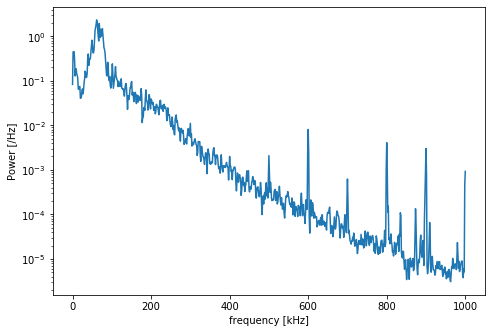

In [66]:
fs=1/(0.000001*(time[1]-time[0])) 
Nwindow= int(0.00075*fs)
window=get_window('hann',Nwindow,True)
nperseg= Nwindow  #int(1000*fs)   #lenght of each segment 
noverlap= nperseg*0.5  #number of points to overlap between segments
nfft=nperseg  #lengh of the fft used

f, Pxx_den = signal.welch(V_data2, fs, window=window, nperseg=nperseg,noverlap=noverlap)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.semilogy(f/1000, Pxx_den)
ax.set_xlabel('frequency [kHz]')
ax.set_ylabel('Power [/Hz]')
fig.savefig('PowerSpectra.png',bbox_inches='tight',pad_inches=0.1)

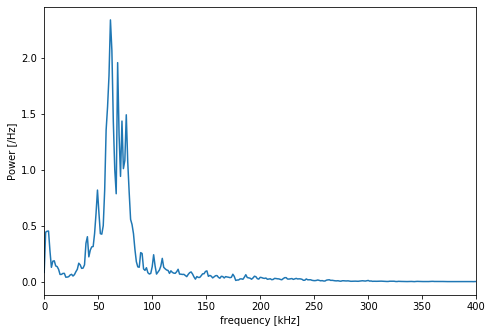

In [3]:
fs=1/(0.000001*(time[1]-time[0])) 
Nwindow= int(0.00075*fs)
window=get_window('hann',Nwindow,True)
nperseg= Nwindow  #int(1000*fs)   #lenght of each segment 
noverlap= nperseg*0.5  #number of points to overlap between segments
nfft=nperseg  #lengh of the fft used

f, Pxx_den = signal.welch(V_data2, fs, window=window, nperseg=nperseg,noverlap=noverlap)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(f/1000, Pxx_den)
ax.set_xlim(0,400)
ax.set_xlabel('frequency [kHz]')
ax.set_ylabel('Power [/Hz]')
fig.savefig('PowerSpectra2.png',bbox_inches='tight',pad_inches=0.1)

In [64]:
print(np.max(Pxx_den))
print(f[np.argmax(Pxx_den)]/1000)
print(Pxx_den[np.argmax(Pxx_den)])


2.3388736
61.33333333333333
2.3388736


In [67]:
f[1]-f[0]

1333.3333333333333

In [4]:
print(np.mean([21.994,21.676]))
print(np.std([21.994,21.676]))

21.835
0.1590000000000007


In [5]:
print(np.mean([17.918,16.676,16.507,17.041,17.300,15.026]))
print(np.std([17.918,16.676,16.507,17.041,17.300,15.026]))

16.744666666666664
0.8933024248384319
